In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('ASTRAMICRO.NS.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-11-01,26.733334,28.000000,25.466665,27.973333,23.467009,153375
1,2004-11-08,29.333332,29.333332,27.466665,27.866667,23.377522,47760
2,2004-11-15,27.866667,28.966665,27.000000,27.466665,23.041958,42465
3,2004-11-22,27.933332,30.700001,27.333332,30.506666,25.592236,156330
4,2004-11-29,30.593332,31.093332,27.420000,27.773333,23.299223,56370


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       953 non-null    object 
 1   Open       953 non-null    float64
 2   High       953 non-null    float64
 3   Low        953 non-null    float64
 4   Close      953 non-null    float64
 5   Adj Close  953 non-null    float64
 6   Volume     953 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 52.2+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,953.000000,953.000000,953.000000,953.000000,953.000000,9.530000e+02
mean,97.150902,102.722452,92.379521,97.076971,90.204363,1.935141e+06
std,60.654891,64.173825,57.859788,60.778104,60.823523,2.796242e+06
min,23.200001,24.950001,21.966665,23.200001,19.980383,4.246500e+04
25%,43.733334,46.299999,41.833332,43.500000,38.378746,4.703090e+05
50%,95.000000,99.333336,88.500000,93.949997,84.911644,1.014542e+06
75%,122.500000,128.699997,116.250000,122.550003,113.598564,2.105121e+06
max,357.899994,374.500000,336.250000,356.700012,356.700012,2.876026e+07


In [11]:
df.corr(numeric_only=True)

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.994999,0.996369,0.991361,0.987203,0.215374
High,0.994999,1.000000,0.995484,0.997601,0.992776,0.261554
Low,0.996369,0.995484,1.000000,0.995764,0.992416,0.221373
Close,0.991361,0.997601,0.995764,1.000000,0.995884,0.260382
Adj Close,0.987203,0.992776,0.992416,0.995884,1.000000,0.268798
Volume,0.215374,0.261554,0.221373,0.260382,0.268798,1.000000


In [12]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

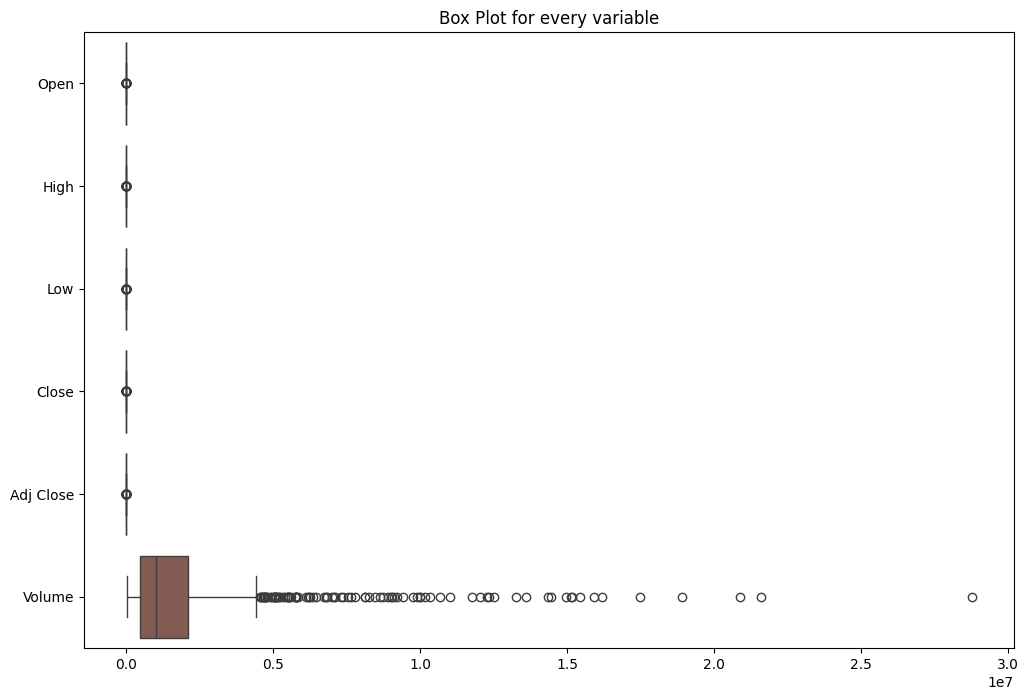

In [13]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df,orient='h')
plt.title('Box Plot for every variable')
plt.show()

In [14]:
df.nunique()

Date         953
Open         760
High         806
Low          779
Close        855
Adj Close    915
Volume       952
dtype: int64

In [15]:
for column in df['Volume']:
        q1 = df['Volume'].quantile(0.25)
        q3 = df['Volume'].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[
            (df['Volume'] >= lower_bound) & (df['Volume'] <= upper_bound)
        ]

<Axes: xlabel='Volume'>

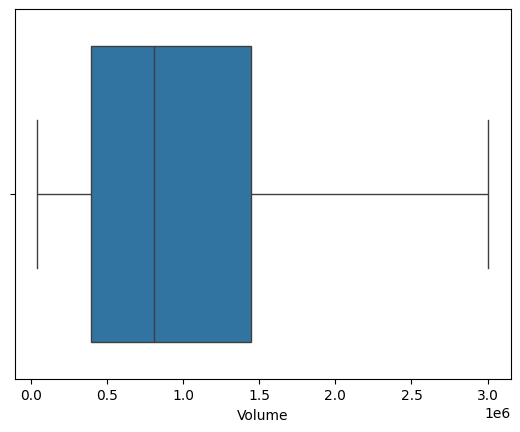

In [17]:
sns.boxplot(df.Volume,orient='h')

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
lb = LabelEncoder()

In [20]:
df1 = df.copy()

In [21]:
df1['Date'] = lb.fit_transform(df1['Date'])

In [22]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,0,26.733334,28.000000,25.466665,27.973333,23.467009,153375
1,1,29.333332,29.333332,27.466665,27.866667,23.377522,47760
2,2,27.866667,28.966665,27.000000,27.466665,23.041958,42465
3,3,27.933332,30.700001,27.333332,30.506666,25.592236,156330
4,4,30.593332,31.093332,27.420000,27.773333,23.299223,56370


In [23]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error

In [46]:
feat_col = ['Open','High','Low','Adj Close','Volume']
X = df1[feat_col]
y = df1['Close']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
from sklearn.preprocessing import StandardScaler
# Feature Scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Convert y_train to NumPy array before reshaping
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

In [52]:
support = SVR()

In [53]:
model = support.fit(X_train_scaled,y_train_scaled)

In [56]:
y_pred_scaled = support.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

In [57]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 41.43
Mean Absolute Error: 3.49
R² Score: 0.99


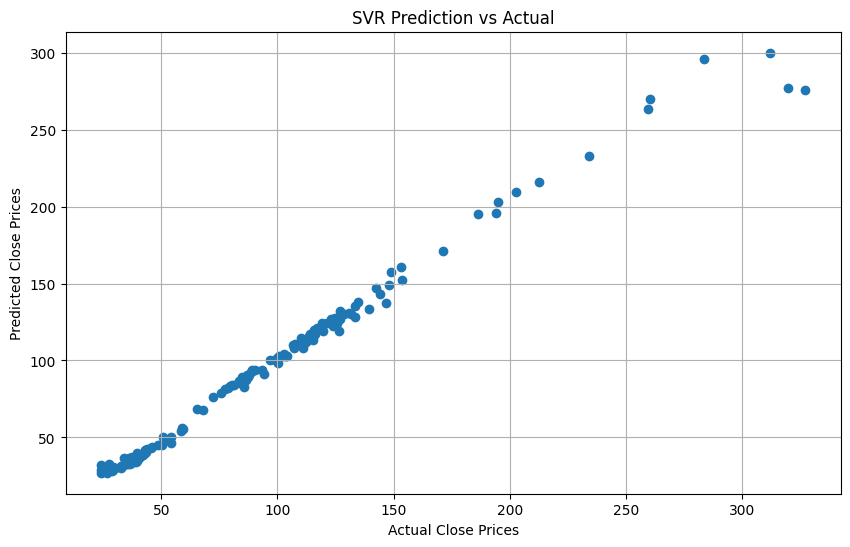

In [59]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Close Prices")
plt.ylabel("Predicted Close Prices")
plt.title("SVR Prediction vs Actual")
plt.grid(True)
plt.show()